<a href="https://colab.research.google.com/github/silvia-denanni/DI-Bootcamp-nov25/blob/main/W8D3DailyChallengeData_CleaningTransformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Data Cleaning:
- Initial Assessment: Load the dataset and conduct a preliminary assessment to understand its structure and content.

- Handling Inconsistencies: Identify and address missing values, incorrect data types, and data inconsistencies.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/sample_data/globalterrorismdb_0718dist.csv', encoding='latin1', on_bad_lines='skip', engine='python')
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [ ]:
df.shape

(131809, 135)

In [ ]:
df.dtypes

,0
eventid,int64
iyear,int64
imonth,int64
iday,int64
approxdate,object
...,...
INT_LOG,float64
INT_IDEO,float64
INT_MISC,float64
INT_ANY,float64


In [ ]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131807 entries, 0 to 131808
Columns: 133 entries, eventid to INT_ANY
dtypes: float64(68), int64(8), object(57)
memory usage: 134.8+ MB


In [ ]:
# Drop empty columns
df_full = df.drop(['approxdate', 'related'], axis = 1)
df_full.head()


,eventid,iyear,imonth,iday,extended,resolution,country,country_txt,region,region_txt,...,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,NaN,58,Dominican Republic,2,Central America & Caribbean,...,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0
1,197000000002,1970,0,0,0,NaN,130,Mexico,1,North America,...,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0
2,197001000001,1970,1,0,0,NaN,160,Philippines,5,Southeast Asia,...,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0
3,197001000002,1970,1,0,0,NaN,78,Greece,8,Western Europe,...,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0
4,197001000003,1970,1,0,0,NaN,101,Japan,4,East Asia,...,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0


In [ ]:
# Check for duplicates
df_full.isna().sum()

,0
eventid,0
iyear,0
imonth,0
iday,0
extended,0
...,...
dbsource,2
INT_LOG,2
INT_IDEO,2
INT_MISC,2


In [ ]:
# Drop rows where any of the specified columns have missing values
df_full.dropna(subset=['dbsource', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY'], inplace=True)

# Verify that the missing values have been handled
df_full.isna().sum()

,0
eventid,0
iyear,0
imonth,0
iday,0
extended,0
...,...
dbsource,0
INT_LOG,0
INT_IDEO,0
INT_MISC,0


In [ ]:
# Actually show all of the columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_seq_items', None)
print(df_full.columns.to_list())

['eventid', 'iyear', 'imonth', 'iday', 'extended', 'resolution', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claimmode2_txt', 'c

In [ ]:
#Fill up empty numerical columns with respective column mean
df_full.fillna(df_full.mean(numeric_only=True), inplace=True)

#3. Exploratory Data Analysis:
- Data Exploration: Conduct exploratory data analysis on the cleaned and integrated dataset.

- Visualization: Create visualizations to reveal patterns and insights related to terrorism events in their socio-economic context.

In [ ]:
#Basic calculations
display(df_full.describe())

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.318070e+05,131807.000000,131807.000000,131807.000000,131807.000000,131807.000000,131807.000000,131807.000000,1.318070e+05,131807.000000,131807.000000,131807.000000,131807.000000,131807.000000,131807.000000,131807.000000,131807.000000,131807.000000,131807.000000,131807.000000,131807.000000,131807.000000,131807.000000,131807.000000,131807.000000,131807.000000,131807.00000,131807.000000,131807.000000,131807.000000,131807.000000,131807.000000,131807.000000,131807.000000,131807.000000,131807.000000,131807.000000,131807.000000,131807.000000,131807.000000,131807.000000,131807.000000,131807.000000,131807.000000,131807.000000,131807.000000,131807.000000,131807.000000,131807.000000,131807.000000,131807.000000,131807.000000,131807.000000,131807.000000,131807.000000,131807.000000,131807.000000,131807.000000,131807.000000,1.318070e+05,131807.000000,131807.000000,131807.000000,131807.000000,131807.000000,131807.000000,1.318070e+05,1.318070e+05,1.318070e+05,131807.000000,131807.000000,131807.000000,131807.000000,131807.000000,131807.000000,131807.000000
mean,1.995983e+11,1995.917372,6.422572,15.398082,0.033481,135.266109,6.470187,21.239100,-6.648329e+02,1.437978,0.063244,0.988058,0.992299,0.892206,-0.875157,1.284227,0.122103,0.914033,0.022882,3.120138,3.399306,4.682692,46.384882,126.987061,9.585258,52.096347,135.29094,9.096128,52.162963,130.492372,0.099432,0.328632,0.352941,0.002109,-48.388927,-2.875566,-0.095224,7.100202,0.181219,7.546512,0.626263,7.609375,-6.846137,6.397870,10.798063,6.535714,10.406655,6.702891,10.955703,6.229885,10.761905,2.268092,0.086965,0.282091,3.186077,0.073207,0.041842,-0.103758,3.336507,3.888929e+05,0.060983,4.340901,-0.519403,-20.157376,-17.396461,-0.122915,3.374691e+06,1.329298e+06,5.754178e+05,522.080851,4.421554,-22.129161,-4.400768,-4.356590,0.098849,-3.733095
std,1.198115e+09,11.981267,3.350282,8.808903,0.179889,118.598522,3.048544,20.743435,2.373925e+05,1.046936,0.288346,0.108624,0.087415,0.310121,2.929530,0.227740,0.327406,0.280316,0.149528,1.853447,0.337426,0.087323,31.146693,85.281271,1.271791,5.464725,28.18077,0.449328,1.957351,9.710645,0.298810,0.034450,0.013294,0.045877,194.354323,11.080680,0.980578,0.742591,0.107743,0.145019,0.013259,0.071997,0.717331,2.136725,6.332528,0.472036,1.728089,0.180567,0.659710,0.037505,0.198496,10.377108,5.357302,2.064177,39.525029,2.879369,0.666425,2.649710,0.305021,8.431933e+06,0.336419,63.095305,2.136000,15.009666,27.443032,0.865724,2.944991e+06,4.601637e+05,1.774684e+05,187.495860,0.434926,12.068205,4.546163,4.606169,0.697971,4.655565
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.00000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,-9.000000,1.000000,0.000000,1.000000,-9.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,-9.900000e+01,-9.000000,-99.000000,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000

In [ ]:
#Count unique values in country_txt column
unique_countries = df_full['country_txt'].unique()
print(f"Number of unique countries: {len(unique_countries)}")
print(unique_countries)

Number of unique countries: 205
['Dominican Republic' 'Mexico' 'Philippines' 'Greece' 'Japan'
 'United States' 'Uruguay' 'Italy' 'East Germany (GDR)' 'Ethiopia'
 'Guatemala' 'Venezuela' 'West Germany (FRG)' 'Switzerland' 'Jordan'
 'Spain' 'Brazil' 'Egypt' 'Argentina' 'Lebanon' 'Ireland' 'Turkey'
 'Paraguay' 'Iran' 'United Kingdom' 'Colombia' 'Bolivia' 'Nicaragua'
 'Netherlands' 'Belgium' 'Canada' 'Australia' 'Pakistan' 'Zambia' 'Sweden'
 'Costa Rica' 'South Yemen' 'Cambodia' 'Israel' 'Poland' 'Taiwan' 'Panama'
 'Kuwait' 'West Bank and Gaza Strip' 'Austria' 'Czechoslovakia' 'India'
 'France' 'South Vietnam' 'Brunei' 'Zaire'
 "People's Republic of the Congo" 'Portugal' 'Algeria' 'El Salvador'
 'Thailand' 'Haiti' 'Sudan' 'Morocco' 'Cyprus' 'Myanmar' 'Afghanistan'
 'Peru' 'Chile' 'Honduras' 'Yugoslavia' 'Ecuador' 'New Zealand' 'Malaysia'
 'Singapore' 'Botswana' 'Jamaica' 'Chad' 'North Yemen' 'Andorra' 'Syria'
 'South Korea' 'United Arab Emirates' 'South Africa' 'Kenya' 'Iraq'
 'Somalia' 'N

In [ ]:
# Setting country_txt column as index
df_full.set_index('country_txt').head()

,eventid,iyear,imonth,iday,extended,resolution,country,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
country_txt,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Dominican Republic,197000000001,1970,7,2,0,NaN,58,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0.0,NaN,NaN,1.0,1.0,1,0.0,1.284227,NaN,0.0,1.0,0.0,1.0,Assassination,3.399306,NaN,4.682692,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,9.585258,NaN,52.096347,NaN,NaN,NaN,135.29094,NaN,9.096128,NaN,52.162963,NaN,NaN,NaN,130.492372,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.328632,0.352941,0.0,-48.388927,-2.875566,-0.095224,7.100202,NaN,0.181219,7.546512,NaN,0.626263,7.609375,NaN,-6.846137,13.0,Unknown,10.798063,NaN,6.535714,NaN,10.406655,NaN,6.702891,NaN,10.955703,NaN,6.229885,NaN,10.761905,NaN,NaN,1.000000,0.086965,0.282091,0.000000,0.073207,0.041842,0.0,3.336507,NaN,388892.943247,NaN,0.0,4.340901,-0.519403,-20.157376,-17.396461,NaN,NaN,0.0,3.374691e+06,1.329298e+06,575417.767325,522.080851,NaN,4.421554,NaN,-22.129161,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0
Mexico,197000000002,1970,0,0,0,NaN,130,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0.0,NaN,NaN,1.0,1.0,1,0.0,1.284227,NaN,0.0,1.0,0.0,6.0,Hostage Taking (Kidnapping),3.399306,NaN,4.682692,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,9.585258,NaN,52.096347,NaN,NaN,NaN,135.29094,NaN,9.096128,NaN,52.162963,NaN,NaN,NaN,130.492372,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.328632,0.352941,0.0,7.000000,-2.875566,-0.095224,7.100202,NaN,0.181219,7.546512,NaN,0.626263,7.609375,NaN,-6.846137,13.0,Unknown,10.798063,NaN,6.535714,NaN,10.406655,NaN,6.702891,NaN,10.955703,NaN,6.229885,NaN,10.761905,NaN,NaN,0.000000,0.086965,0.282091,0.000000,0.073207,0.041842,0.0,3.336507,NaN,388892.943247,NaN,1.0,1.000000,0.000000,-20.157376,-17.396461,NaN,Mexico,1.0,8.000000e+05,1.329298e+06,575417.767325,522.080851,NaN,4.421554,NaN,-22.129161,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0
Philippines,197001000001,1970,1,0,0,NaN,160,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0.0,NaN,NaN,1.0,1.0,1,0.0,1.284227,NaN,0.0,1.0,0.0,1.0,Assassination,3.399306,NaN,4.682692,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,9.585258,NaN,52.096347,NaN,NaN,NaN,135.29094,NaN,9.096128,NaN,52.162963,NaN,NaN,NaN,130.492372,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.328632,0.352941,0.0,-48.388927,-2.875566,-0.095224,7.100202,NaN,0.181219,7.546512,NaN,

In [ ]:
#Count occurrences of each country in country_txt column
country_counts = df_full['country_txt'].value_counts()
print("Occurrences of each country in 'country_txt':")

#Top 5 and last 5 appearing countries for terror attacks with relative number
country_counts



Occurrences of each country in 'country_txt':


,count
country_txt,
Iraq,11282
Pakistan,9158
Colombia,8726
India,8505
Peru,7547
...,...
Wallis and Futuna,1
North Korea,1
St. Lucia,1


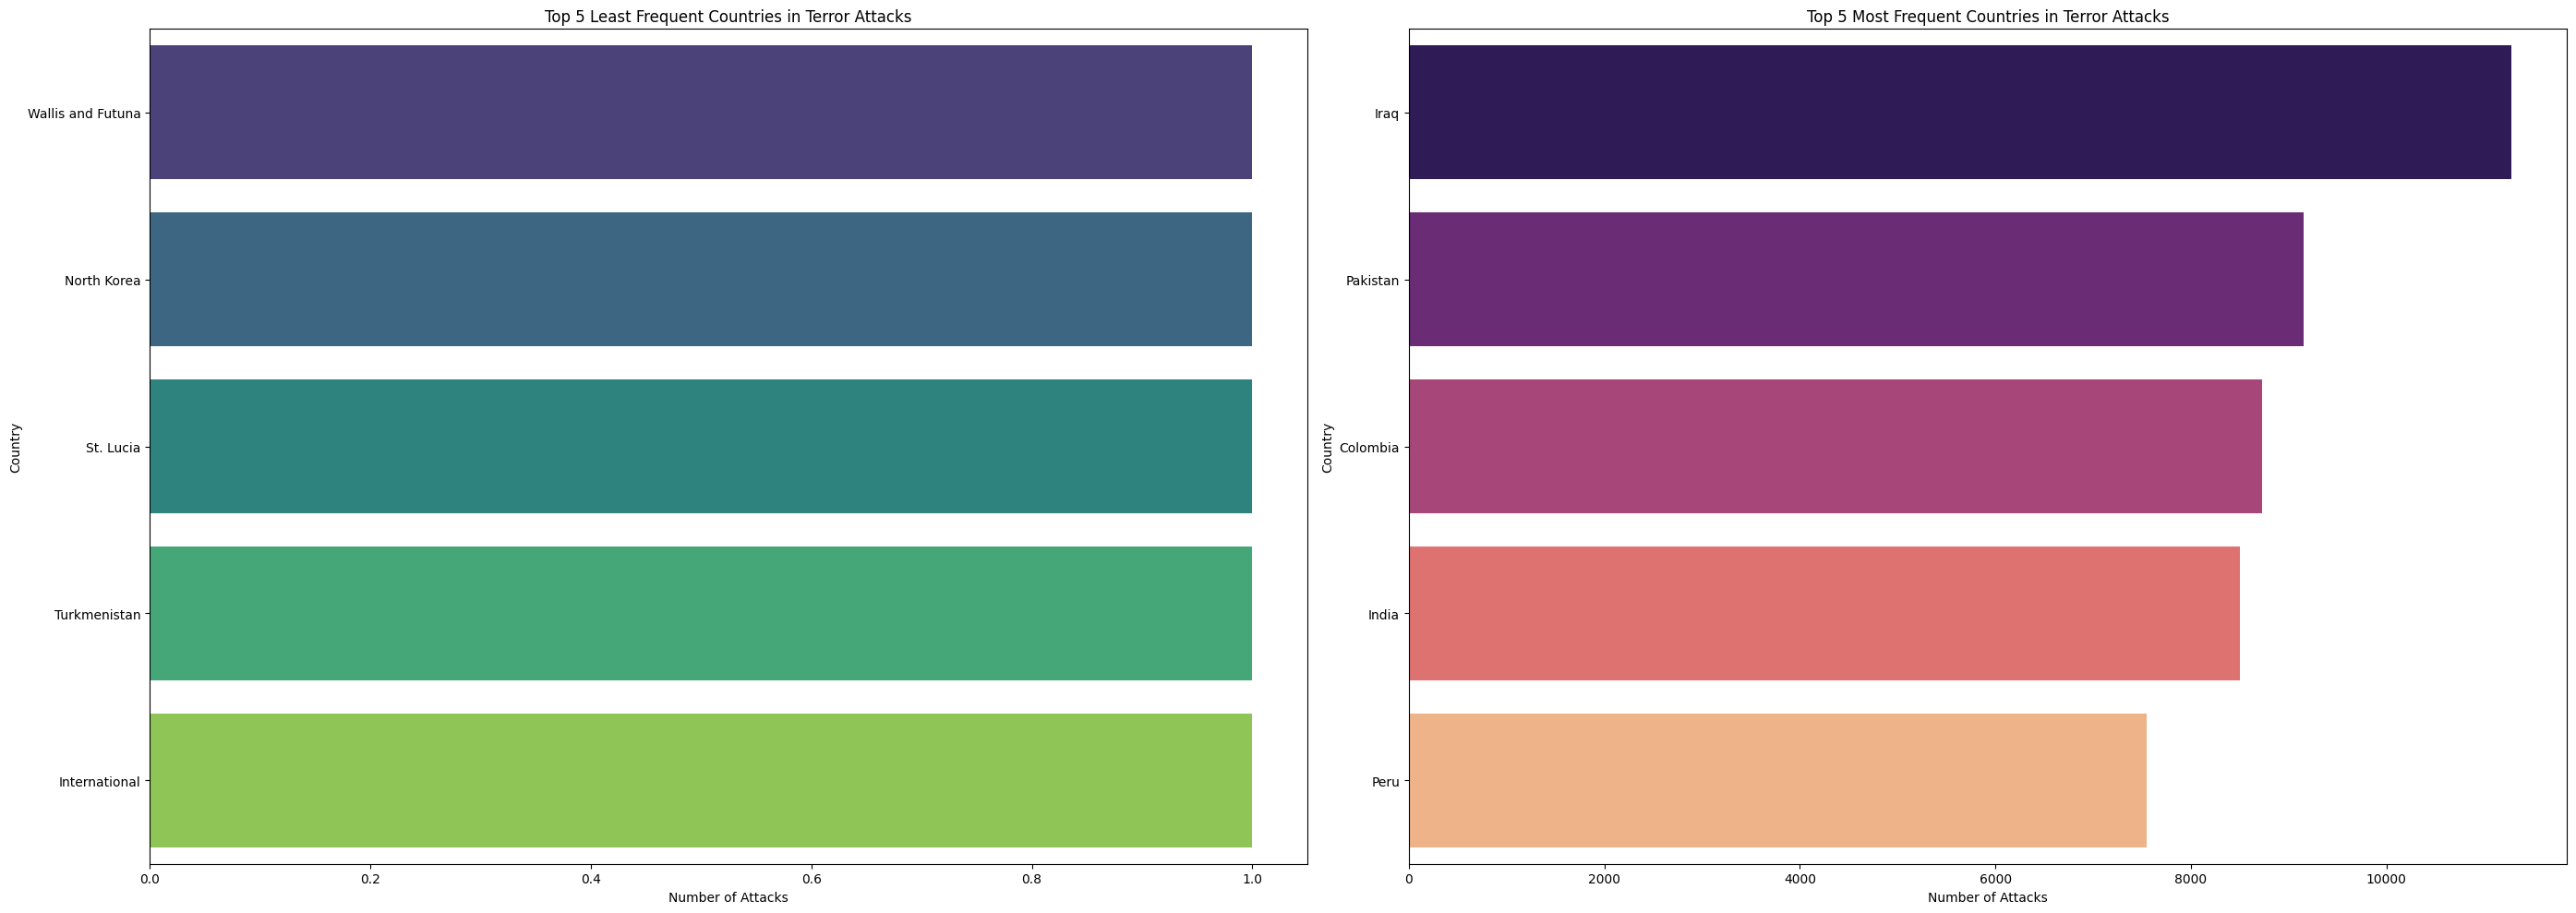

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(28, 10)) # Increased height for horizontal bars

# Plot 1: Top 5 Least Frequent Countries (Horizontal Bar Plot)
least_frequent_countries = country_counts.tail()
sns.barplot(y=least_frequent_countries.index, x=least_frequent_countries.values, hue=least_frequent_countries.index, palette='viridis', legend=False, ax=axes[0])
axes[0].set_title('Top 5 Least Frequent Countries in Terror Attacks')
axes[0].set_ylabel('Country')
axes[0].set_xlabel('Number of Attacks')
# No rotation needed for y-axis labels in horizontal bar chart

# Plot 2: Top 5 Most Frequent Countries (Horizontal Bar Plot)
most_frequent_countries = country_counts.head()
sns.barplot(y=most_frequent_countries.index, x=most_frequent_countries.values, hue=most_frequent_countries.index, palette='magma', legend=False, ax=axes[1])
axes[1].set_title('Top 5 Most Frequent Countries in Terror Attacks')
axes[1].set_ylabel('Country')
axes[1].set_xlabel('Number of Attacks')
# No rotation needed for y-axis labels in horizontal bar chart

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

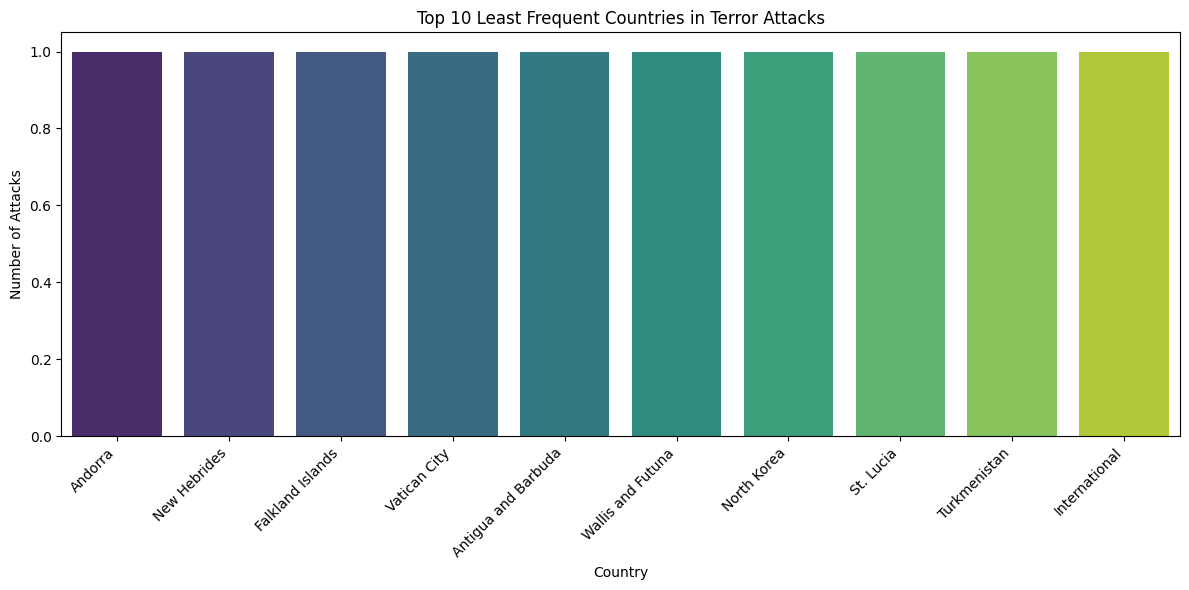

In [ ]:
plt.figure(figsize=(12, 6))
# Select the last 10 countries (least frequent) from the country_counts Series
least_frequent_countries = country_counts.tail(10)
# Use the index (country names) for x and values (counts) for y
sns.barplot(x=least_frequent_countries.index, y=least_frequent_countries.values, hue=least_frequent_countries.index, palette='viridis', legend=False)
plt.title('Top 10 Least Frequent Countries in Terror Attacks')
plt.xlabel('Country')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout()
plt.show()

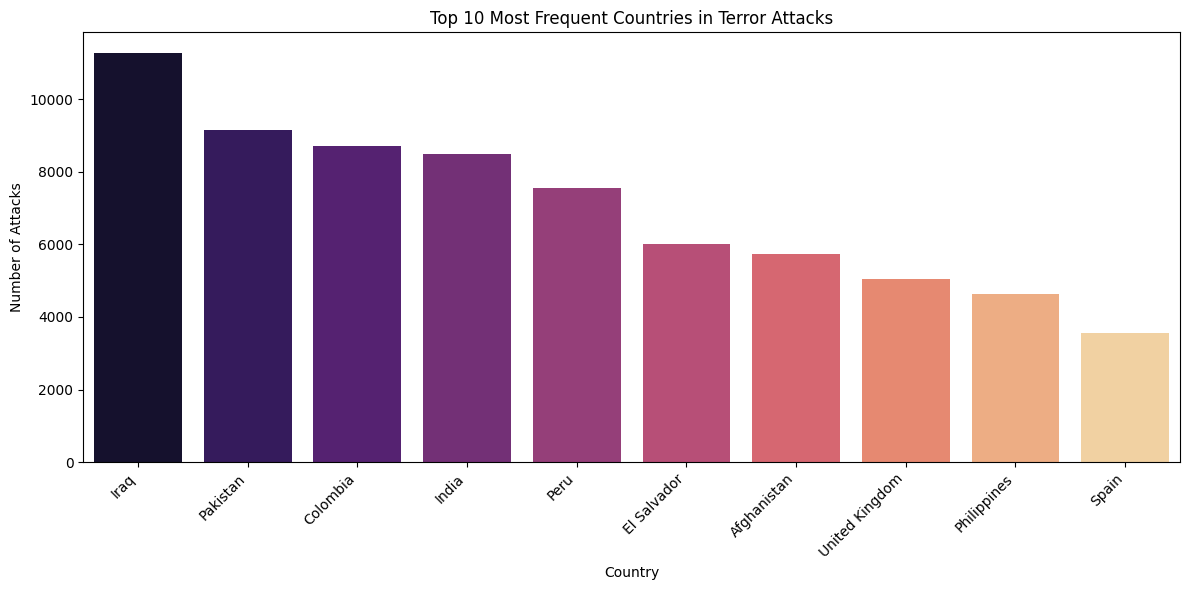

In [ ]:
# Visualize the most frequent countries in terrorist attacks using a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=country_counts.index[:10], y=country_counts.values[:10], hue=country_counts.index[:10], palette='magma', legend=False)
plt.title('Top 10 Most Frequent Countries in Terror Attacks')
plt.xlabel('Country')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Count occurrences of world regions in region_txt column
region_counts = df_full['region_txt'].value_counts()
print("Occurrences of each region in 'region_txt':")
print(region_counts)

Occurrences of each region in 'region_txt':
region_txt
South Asia                     28515
Middle East & North Africa     26945
South America                  21589
Western Europe                 16719
Central America & Caribbean    11854
Sub-Saharan Africa              9566
Southeast Asia                  8564
North America                   3309
Eastern Europe                  3222
East Asia                        749
Central Asia                     520
Australasia & Oceania            255
Name: count, dtype: int64


In [ ]:
# Group by region and sum casualties
regional_casualties = df_full.groupby('region_txt')[['nkill', 'nwound']].sum().reset_index()
regional_casualties['total_casualties'] = regional_casualties['nkill'] + regional_casualties['nwound']

# Sort by total casualties for better visualization
regional_casualties = regional_casualties.sort_values(by='total_casualties', ascending=False)

print("Total casualties by region:")
display(regional_casualties)

Total casualties by region:


,region_txt,nkill,nwound,total_casualties
5,Middle East & North Africa,71048.521566,138883.882077,209932.403643
8,South Asia,73578.092183,110056.146281,183634.238465
10,Sub-Saharan Africa,43205.909629,36021.095548,79227.005177
7,South America,37257.469131,24498.459756,61755.928887
1,Central America & Caribbean,38368.350852,19247.479205,57615.830057
9,Southeast Asia,14526.597076,23519.567306,38046.164382
11,Western Europe,8885.202489,26712.009475,35597.211964
6,North America,5169.468769,20733.887430,25903.356199
4,Eastern Europe,5037.230277,9317.073506,14354.303783
3,East Asia,733.919415,8691.815220,9425.734635


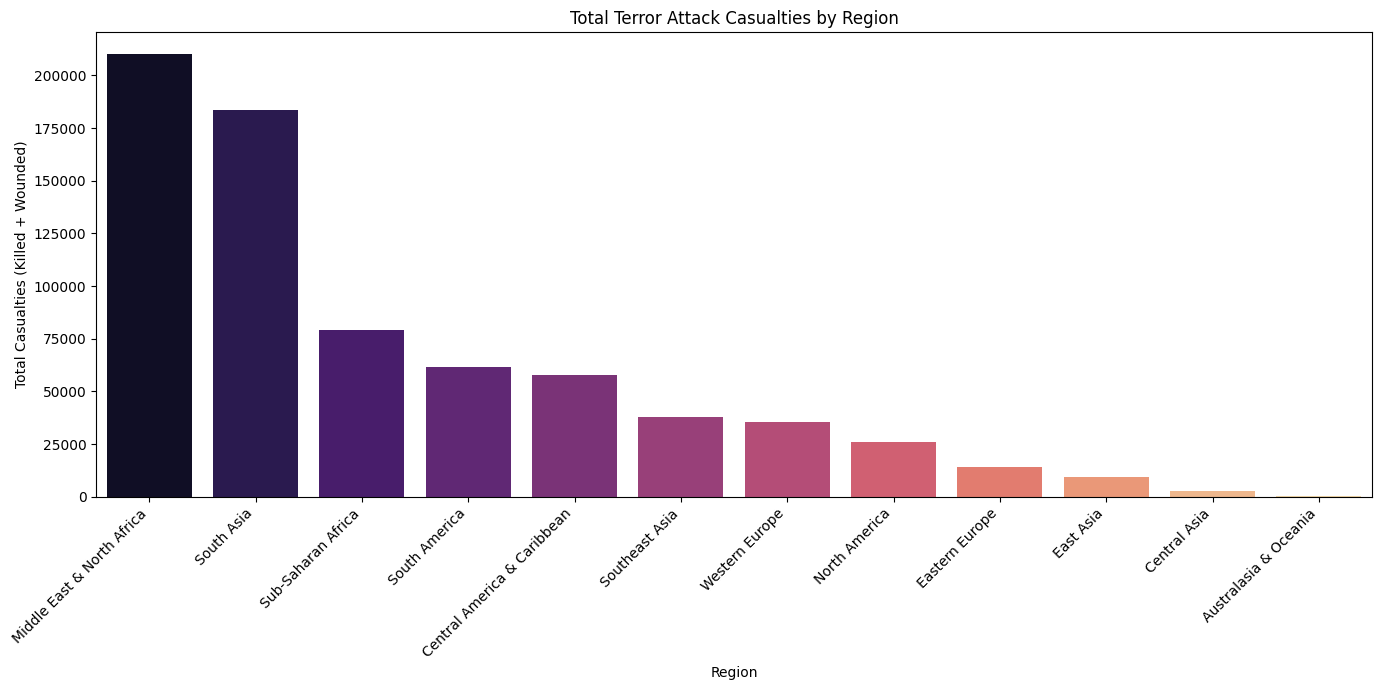

In [101]:
# Visualize total casualties by region
plt.figure(figsize=(14, 7))
sns.barplot(x='region_txt', y='total_casualties', data=regional_casualties, hue='region_txt', palette='magma', legend=False)
plt.title('Total Terror Attack Casualties by Region')
plt.xlabel('Region')
plt.ylabel('Total Casualties (Killed + Wounded)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Count occurrences of each attack type
attack_type_counts = df_full['attacktype1_txt'].value_counts()
print("Occurrences of each attack type:")
print(attack_type_counts)

Occurrences of each attack type:
attacktype1_txt
Bombing/Explosion                      62578
Armed Assault                          31638
Assassination                          17029
Facility/Infrastructure Attack          7669
Hostage Taking (Kidnapping)             6735
Unknown                                 4178
Hostage Taking (Barricade Incident)      794
Unarmed Assault                          702
Hijacking                                484
Name: count, dtype: int64


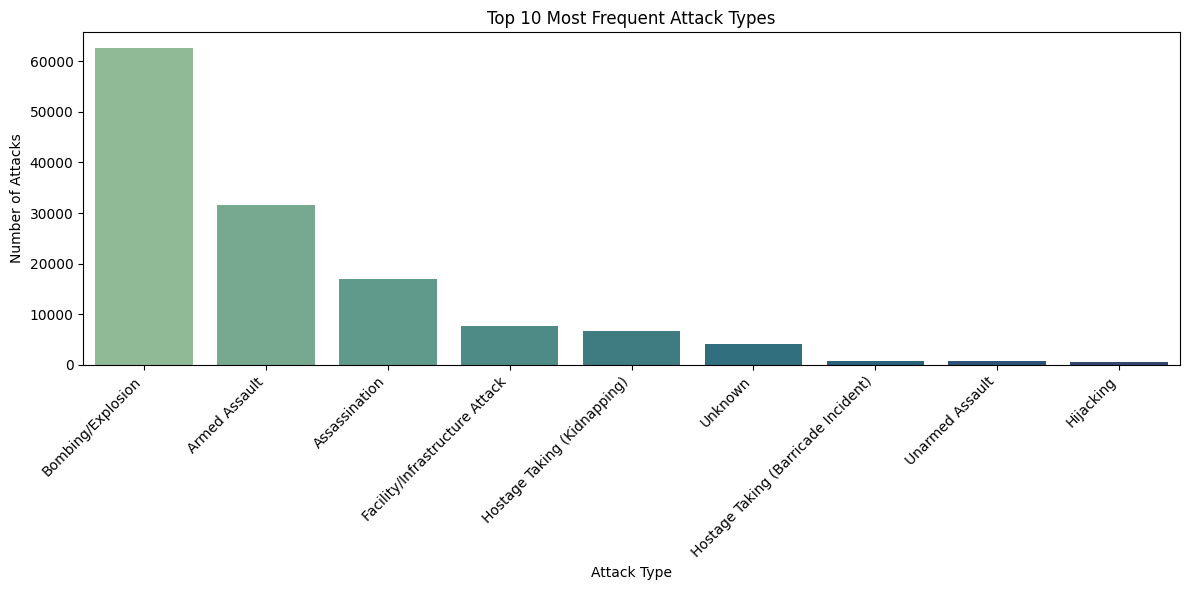

In [ ]:
# Visualize the most frequent attack types
plt.figure(figsize=(12, 6))
sns.barplot(x=attack_type_counts.index[:10], y=attack_type_counts.values[:10], hue=attack_type_counts.index[:10], palette='crest', legend=False)
plt.title('Top 10 Most Frequent Attack Types')
plt.xlabel('Attack Type')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#2. Data Transformation:
- Categorical Transformation: Convert categorical data into a format suitable for analysis, such as one-hot encoding.

- Numerical Normalization: Normalize or standardize numerical features as required.

**Numerical normalization through StandardScaler**
 to numerical features to standardize their scales

In [ ]:
from sklearn.preprocessing import StandardScaler

# Numerical columns for scaling (excluding IDs and already encoded categorical columns)
numerical_cols = ['iyear', 'imonth', 'iday', 'latitude', 'longitude', 'nkill', 'nwound', 'propvalue', 'ransomamt', 'ransompaid']

# Initialize StandardScaler
scaler = StandardScaler()

# Create a copy of the encoded DataFrame to store scaled values
df_scaled = df_encoded.copy()

# Apply scaling to selected numerical columns
df_scaled[numerical_cols] = scaler.fit_transform(df_scaled[numerical_cols])

print("First 5 rows of the DataFrame after numerical scaling:")
display(df_scaled[numerical_cols].head())

print("Summary statistics of scaled numerical columns:")
display(df_scaled[numerical_cols].describe())

First 5 rows of the DataFrame after numerical scaling:


,iyear,imonth,iday,latitude,longitude,nkill,nwound,propvalue,ransomamt,ransompaid
0,-2.163166,0.172353,-1.520976,-0.134130,0.002506,-1.222014e-01,-8.060940e-02,-6.903267e-18,6.324814e-16,0.0
1,-2.163166,-1.917032,-1.748020,-0.090015,0.002383,-2.185677e-01,-8.060940e-02,-6.903267e-18,-8.742642e-01,0.0
2,-2.163166,-1.618548,-1.748020,-0.277703,0.003309,-1.222014e-01,-8.060940e-02,-6.903267e-18,6.324814e-16,0.0
3,-2.163166,-1.618548,-1.748020,0.807892,0.002901,-4.279525e-17,2.247138e-17,-6.903267e-18,6.324814e-16,0.0
4,-2.163166,-1.618548,-1.748020,0.594953,0.003350,-4.279525e-17,2.247138e-17,-6.903267e-18,6.324814e-16,0.0


Summary statistics of scaled numerical columns:


,iyear,imonth,iday,latitude,longitude,nkill,nwound,propvalue,ransomamt,ransompaid
count,1.318070e+05,1.318070e+05,1.318070e+05,1.318070e+05,1.318070e+05,1.318070e+05,1.318070e+05,1.318070e+05,1.318070e+05,1.318070e+05
mean,3.405249e-15,8.021483e-17,7.762725e-17,-3.018838e-17,1.175864e-18,-3.363848e-17,1.881383e-17,-3.247946e-18,6.345219e-16,1.307265e-18
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00
min,-2.163166e+00,-1.917032e+00,-1.748020e+00,-3.586387e+00,-3.630509e+02,-2.185677e-01,-8.060940e-02,-4.613336e-02,-1.145947e+00,-3.242938e+00
25%,-8.277430e-01,-7.230979e-01,-8.398446e-01,-6.420259e-01,2.495156e-03,-2.185677e-01,-8.060940e-02,-6.903267e-18,6.324814e-16,0.000000e+00
50%,-1.600314e-01,-1.261309e-01,-4.519105e-02,2.367358e-01,2.924270e-03,-2.185677e-01,-8.060940e-02,-6.903267e-18,6.324814e-16,0.000000e+00
75%,1.008464e+00,7.693196e-01,8.629845e-01,6.573791e-01,3.083413e-03,-2.583507e-02,-4.707836e-03,-6.903267e-18,6.324814e-16,0.000000e+00
max,1.425784e+00,1.664770e+00,1.771160e+00,2.574051e+00,3.556148e-03,1.331524e+02,2.071559e+02,3.201664e+02,3.384149e+02,2.277856e+02


**Correlation analysis of scaled numerical features**
to understand their linear relationships

In [ ]:
# Calculate the correlation matrix for the scaled numerical columns
correlation_matrix = df_scaled[numerical_cols].corr()

print("Correlation Matrix of Scaled Numerical Features:")
display(correlation_matrix)

Correlation Matrix of Scaled Numerical Features:


,iyear,imonth,iday,latitude,longitude,nkill,nwound,propvalue,ransomamt,ransompaid
iyear,1.000000,-0.008682,0.006816,0.165992,3.396517e-03,0.007484,0.023578,-2.627412e-03,0.000462,-8.350519e-03
imonth,-0.008682,1.000000,0.000624,-0.021801,-4.587066e-03,0.004146,0.003338,-1.490567e-03,-0.000953,2.150394e-04
iday,0.006816,0.000624,1.000000,-0.000808,-2.682046e-03,-0.002448,-0.000549,-3.539739e-04,0.001138,8.355931e-04
latitude,0.165992,-0.021801,-0.000808,1.000000,1.227095e-03,-0.022063,0.016389,4.878837e-03,0.004383,-2.984299e-03
longitude,0.003397,-0.004587,-0.002682,0.001227,1.000000e+00,-0.000740,0.000231,-1.801772e-07,0.000002,5.394468e-07
nkill,0.007484,0.004146,-0.002448,-0.022063,-7.401819e-04,1.000000,0.540674,1.021387e-02,0.001150,-4.008093e-04
nwound,0.023578,0.003338,-0.000549,0.016389,2.309757e-04,0.540674,1.000000,2.039541e-02,-0.000027,-1.205413e-04
propvalue,-0.002627,-0.001491,-0.000354,0.004879,-1.801772e-07,0.010214,0.020395,1.000000e+00,-0.000010,-1.926343e-05
ransomamt,0.000462,-0.000953,0.001138,0.004383,1.751716e-06,0.001150,-0.000027,-9.846737e-06,1.000000,8.847484e-02
ransompaid,-0.008351,0.000215,0.000836,-0.002984,5.394468e-07,-0.000401,-0.000121,-1.926343e-05,0.088475,1.000000e+00


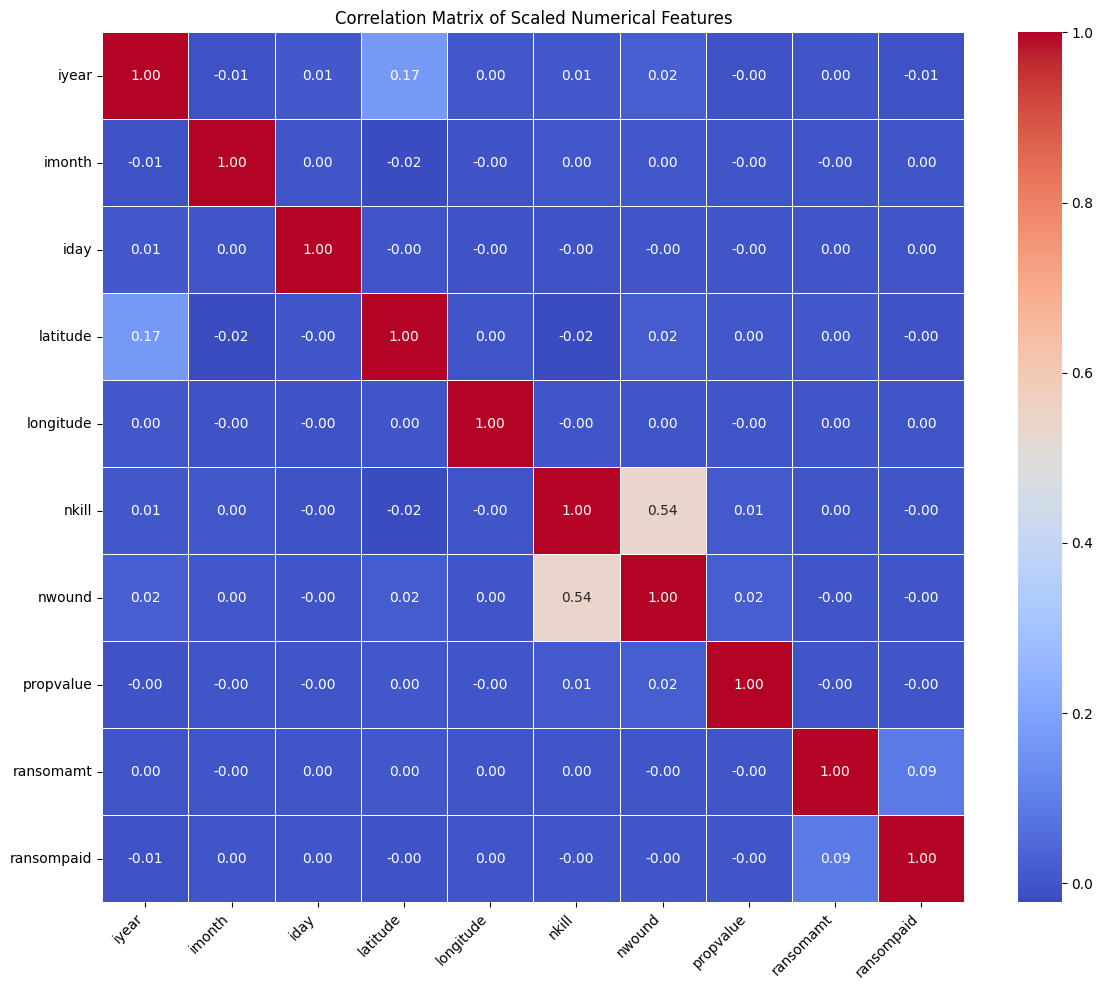

In [ ]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Scaled Numerical Features')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

***Key observations from "Scaled numerical features" heatmap***:

- **nkill (number killed) and nwound (number wounded)**: This pair shows the most prominent **positive correlation (around 0.54)**.

Terror attacks that result in a **higher number of fatalities** are also very likely to result in a **higher number of injuries**. This strong positive relationship is clearly visible as a darker red cell on the heatmap.

#Analyze average casualty number by weapon type:
average number of people killed and wounded per weapon type


In [ ]:
# Group by weapon type and calculate mean casualties
weap_type_casualties = df_full.groupby('weaptype1_txt')[['nkill', 'nwound']].mean().reset_index()

# Sort by total casualties (nkill + nwound) to visualize impact
weap_type_casualties['total_casualties'] = weap_type_casualties['nkill'] + weap_type_casualties['nwound']
weap_type_casualties = weap_type_casualties.sort_values(by='total_casualties', ascending=False)

print("Average casualties by Weapon Type:")
display(weap_type_casualties)

Average casualties by Weapon Type:


,weaptype1_txt,nkill,nwound,total_casualties
11,Vehicle (not to include vehicle-borne explosiv...,52.576271,283.789123,336.365394
1,Chemical,2.131320,45.924344,48.055664
0,Biological,0.321945,23.273092,23.595038
2,Explosives,1.722325,4.560115,6.282440
6,Melee,3.653135,1.815139,5.468274
4,Firearms,3.175336,1.608114,4.783450
10,Unknown,2.543456,1.489110,4.032566
9,Sabotage Equipment,0.669018,1.945125,2.614144
7,Other,0.462057,1.313309,1.775366
5,Incendiary,0.590418,0.684902,1.275320


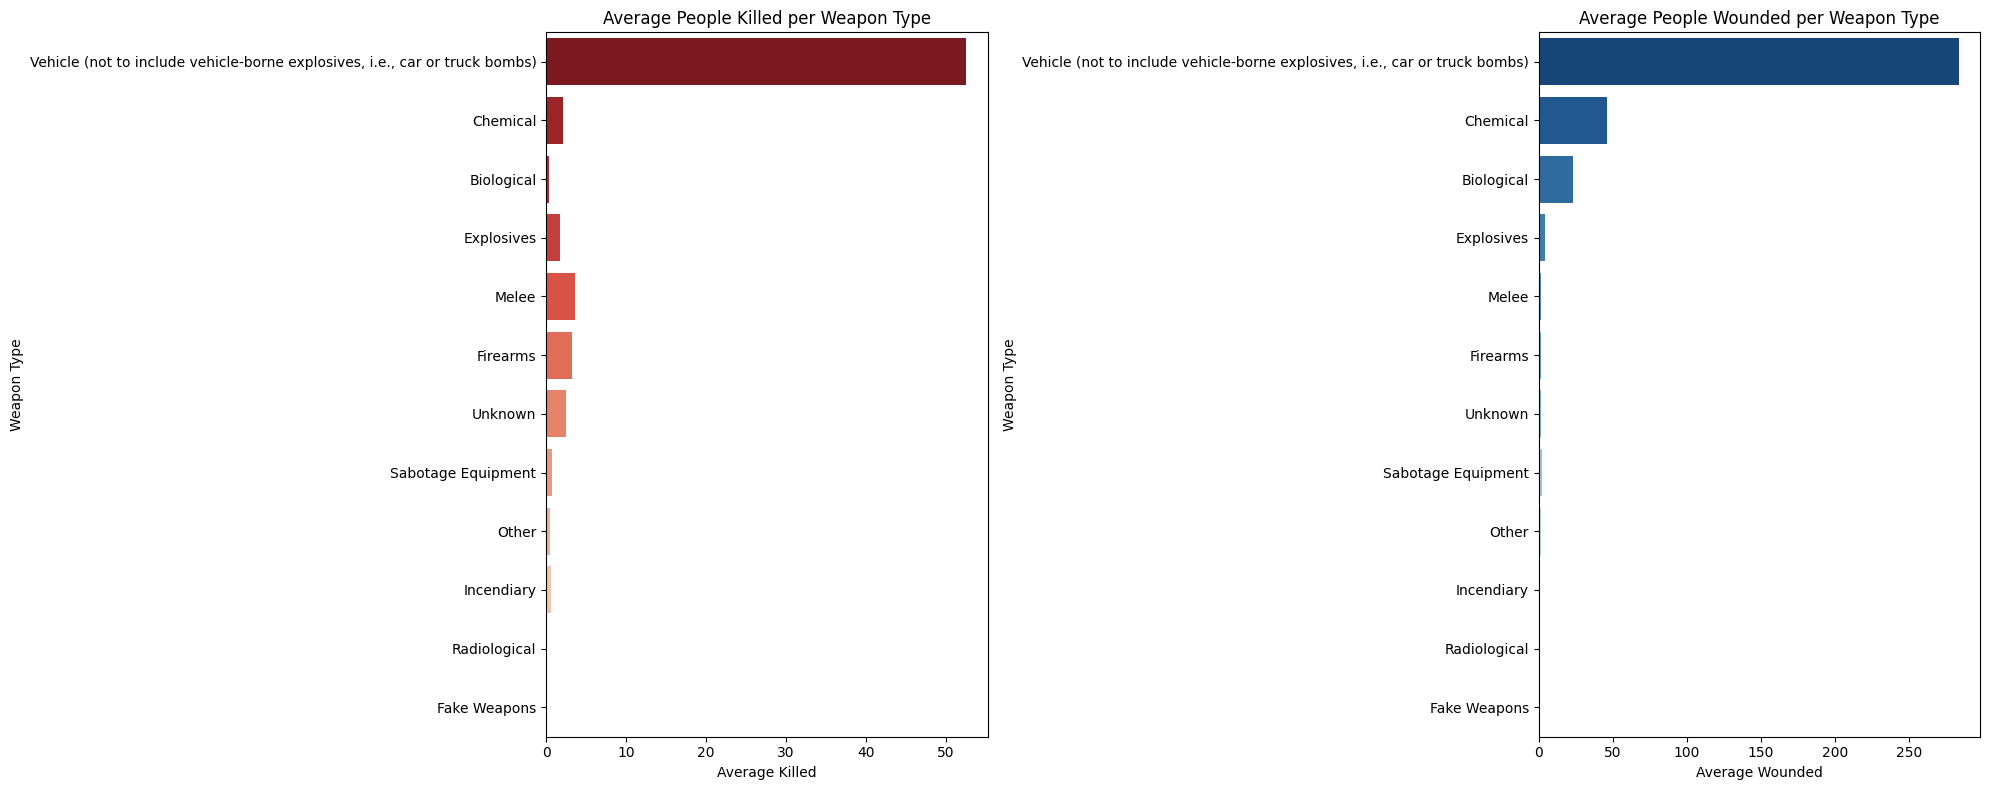

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot average kills per weapon type
sns.barplot(x='nkill', y='weaptype1_txt', data=weap_type_casualties, hue='weaptype1_txt', palette='Reds_r', legend=False, ax=axes[0])
axes[0].set_title('Average People Killed per Weapon Type')
axes[0].set_xlabel('Average Killed')
axes[0].set_ylabel('Weapon Type')

# Plot average wounded per weapon type
sns.barplot(x='nwound', y='weaptype1_txt', data=weap_type_casualties, hue='weaptype1_txt', palette='Blues_r', legend=False, ax=axes[1])
axes[1].set_title('Average People Wounded per Weapon Type')
axes[1].set_xlabel('Average Wounded')
axes[1].set_ylabel('Weapon Type')

plt.tight_layout()
plt.show()

# Relationship between attack type and casualties
average number of people killed and wounded per attack type

In [ ]:
# Group by attack type and calculate mean casualties
attack_type_casualties = df_full.groupby('attacktype1_txt')[['nkill', 'nwound']].mean().reset_index()

# Sort by total casualties (nkill + nwound) to visualize impact
attack_type_casualties['total_casualties'] = attack_type_casualties['nkill'] + attack_type_casualties['nwound']
attack_type_casualties = attack_type_casualties.sort_values(by='total_casualties', ascending=False)

print("Average casualties by Attack Type:")
display(attack_type_casualties)

Average casualties by Attack Type:


,attacktype1_txt,nkill,nwound,total_casualties
4,Hijacking,7.888623,35.579715,43.468339
7,Unarmed Assault,1.087204,16.997683,18.084887
8,Unknown,4.388467,2.377556,6.766023
2,Bombing/Explosion,1.718787,4.579991,6.298778
0,Armed Assault,4.117093,2.077017,6.194109
5,Hostage Taking (Barricade Incident),2.924166,3.001381,5.925547
1,Assassination,1.346474,0.900607,2.247081
6,Hostage Taking (Kidnapping),1.275501,0.857145,2.132646
3,Facility/Infrastructure Attack,0.570856,0.658376,1.229232


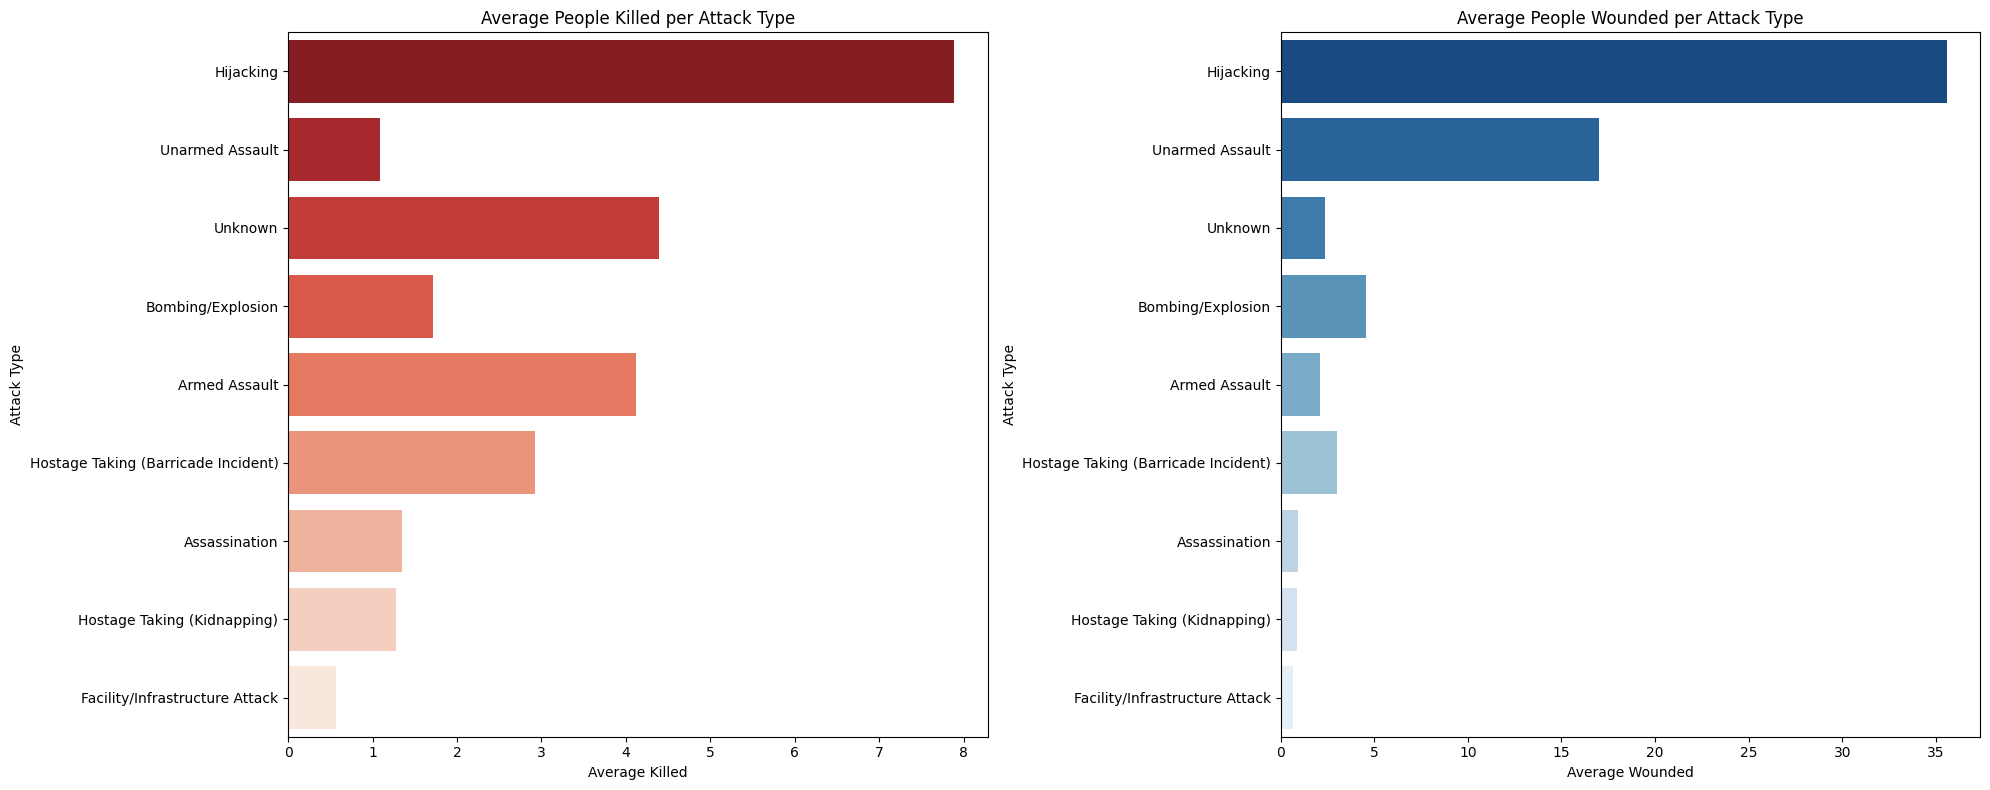

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot average kills per attack type
sns.barplot(x='nkill', y='attacktype1_txt', data=attack_type_casualties, hue='attacktype1_txt', palette='Reds_r', legend=False, ax=axes[0])
axes[0].set_title('Average People Killed per Attack Type')
axes[0].set_xlabel('Average Killed')
axes[0].set_ylabel('Attack Type')

# Plot average wounded per attack type
sns.barplot(x='nwound', y='attacktype1_txt', data=attack_type_casualties, hue='attacktype1_txt', palette='Blues_r', legend=False, ax=axes[1])
axes[1].set_title('Average People Wounded per Attack Type')
axes[1].set_xlabel('Average Wounded')
axes[1].set_ylabel('Attack Type')

plt.tight_layout()
plt.show()

#Counting key categorical occurrences:

In [ ]:
# Count occurrences of target nationality in 'natlty1_txt' column
natlty1_counts = df_full['natlty1_txt'].value_counts()
print("Occurrences of each value in 'natlty1_txt':")
print(natlty1_counts)

Occurrences of each value in 'natlty1_txt':
natlty1_txt
Iraq                              10805
Pakistan                           8747
India                              8636
Colombia                           8296
Peru                               7187
                                  ...  
Western Sahara                        1
People's Republic of the Congo        1
Man, Isle of                          1
Greenland                             1
St. Lucia                             1
Name: count, Length: 210, dtype: int64


In [ ]:
# Count occurrences of typical target category in 'targsubtype1_txt' column
targsubtype1_counts = df_full['targsubtype1_txt'].value_counts()
print("Occurrences of each value in 'targsubtype1_txt':")
print(targsubtype1_counts)

Occurrences of each value in 'targsubtype1_txt':
targsubtype1_txt
Police Security Forces/Officers                         8444
Unnamed Civilian/Unspecified                            7387
Military Unit/Patrol/Convoy                             7059
Politician or Political Party Movement/Meeting/Rally    5306
Government Personnel (excluding police, military)       5217
                                                        ... 
Military Weaponry                                         18
Fire Fighter/Truck                                        13
Oil Tanker                                                12
Non-combatant Personnel                                    7
Internet Infrastructure                                    4
Name: count, Length: 112, dtype: int64


In [ ]:
# Count occurrences of each value in 'gname'
gname_counts = df_full['gname'].value_counts()
print("Occurrences of each value in 'gname':")
print(gname_counts)

Occurrences of each value in 'gname':
gname
Unknown                                             57688
Shining Path (SL)                                    5581
Farabundo Marti National Liberation Front (FMLN)     4019
Taliban                                              3119
Irish Republican Army (IRA)                          2847
                                                    ...  
Balakhani Group                                         1
Sayfullakh                                              1
Colonel Albert Kahasha Militia                          1
Los Rastrojos (Colombia)                                1
English Defense League (EDL)                            1
Name: count, Length: 3085, dtype: int64


In [ ]:
# Count occurrences of each value in 'weaptype1_txt'
weaptype1_counts = df_full['weaptype1_txt'].value_counts()
print("Occurrences of each value in 'weaptype1_txt':")
print(weaptype1_counts)

Occurrences of each value in 'weaptype1_txt':
weaptype1_txt
Explosives                                                                     64159
Firearms                                                                       45411
Unknown                                                                        10383
Incendiary                                                                      8866
Melee                                                                           2435
Chemical                                                                         229
Sabotage Equipment                                                               114
Other                                                                             72
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)       59
Biological                                                                        35
Fake Weapons                                                                      30
Radio

In [ ]:
# Calculate value counts for each specified column
targsubtype1_counts = df_full['targsubtype1_txt'].value_counts()
natlty1_counts = df_full['natlty1_txt'].value_counts()
gname_counts = df_full['gname'].value_counts()
weaptype1_counts = df_full['weaptype1_txt'].value_counts()
region_counts = df_full['region_txt'].value_counts()

# Combine these Series into a single DataFrame
# Using concat and renaming columns for clarity
combined_counts_df = pd.concat([
    targsubtype1_counts.rename('targsubtype1_txt_counts'),
    natlty1_counts.rename('natlty1_txt_counts'),
    gname_counts.rename('gname_counts'),
    weaptype1_counts.rename('weaptype1_txt_counts'),
    region_counts.rename('region_txt_counts')
], axis=1).fillna(0).astype(int)

print("Combined occurrences for selected columns:")
display(combined_counts_df)

Combined occurrences for selected columns:


,targsubtype1_txt_counts,natlty1_txt_counts,gname_counts,weaptype1_txt_counts,region_txt_counts
Police Security Forces/Officers,8444,0,0,0,0
Unnamed Civilian/Unspecified,7387,0,0,0,0
Military Unit/Patrol/Convoy,7059,0,0,0,0
Politician or Political Party Movement/Meeting/Rally,5306,0,0,0,0
"Government Personnel (excluding police, military)",5217,0,0,0,0
...,...,...,...,...,...
North America,0,0,0,0,3309
Eastern Europe,0,0,0,0,3222
East Asia,0,0,0,0,749
Central Asia,0,0,0,0,520


# Visualization of top 10 most frequent values for:
- target nationality,
- target category,
- name of terror group,
- weapon type in the attack
- world region:

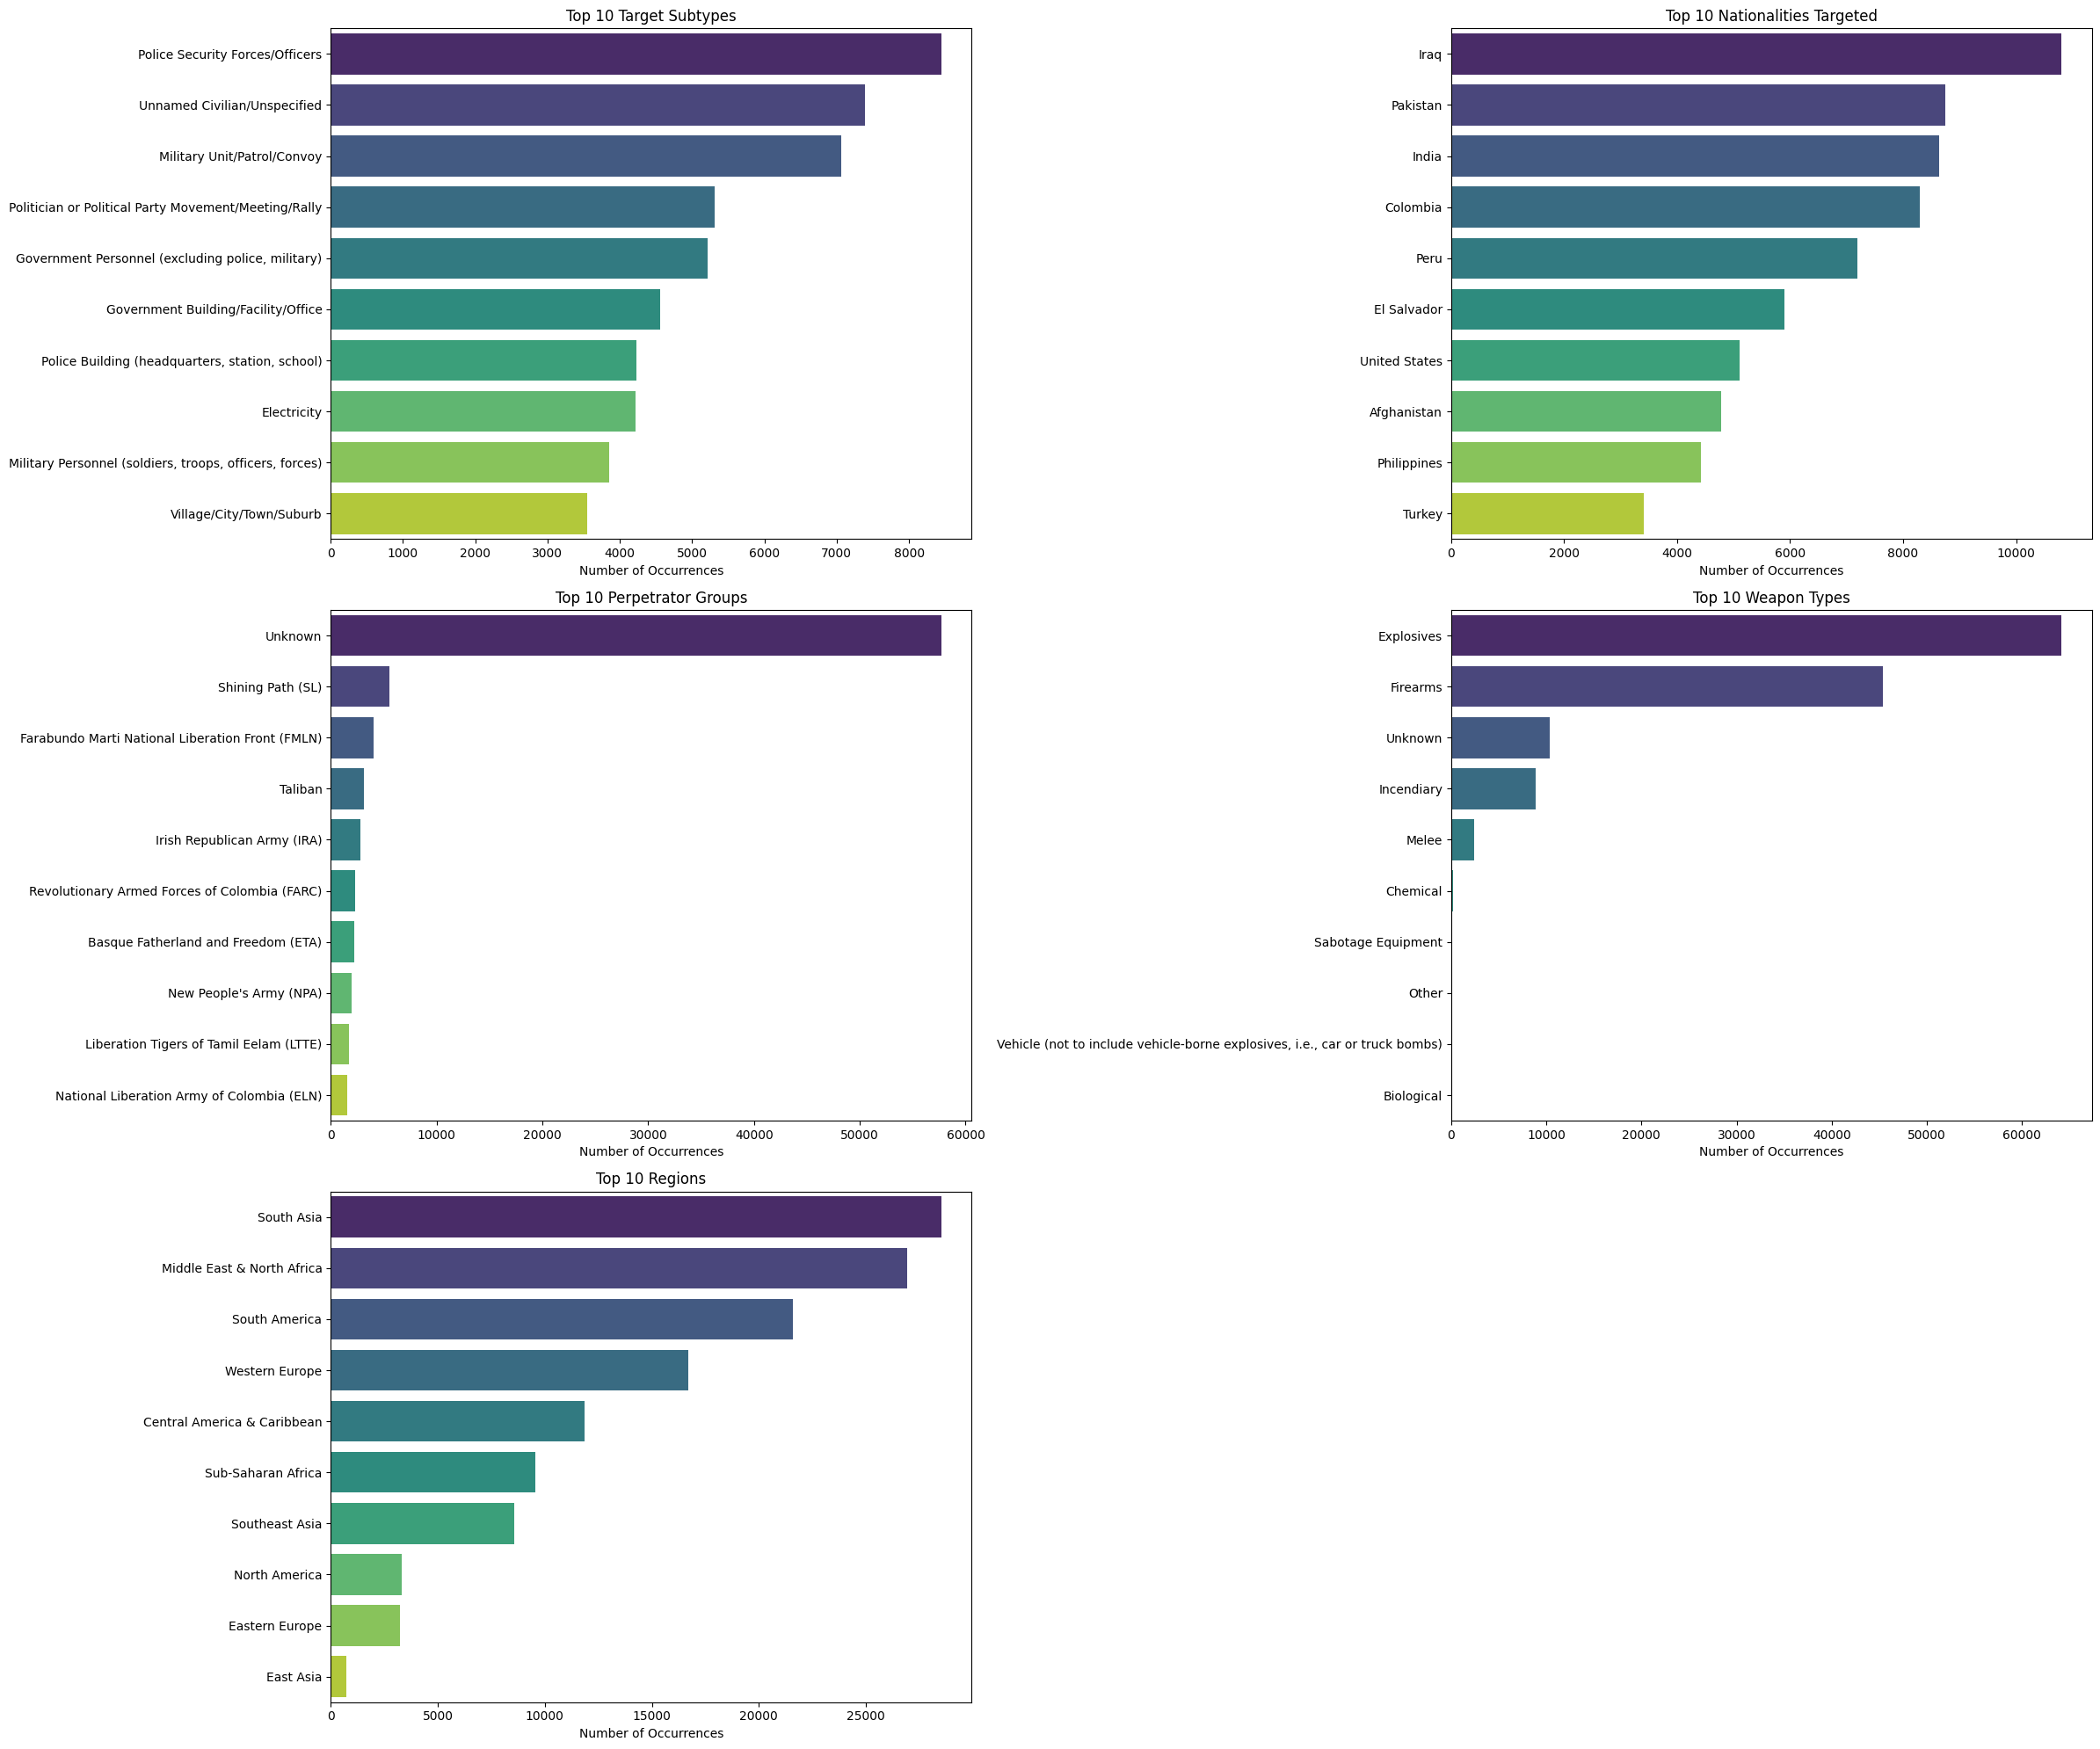

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(24, 20))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

columns_to_plot = [
    ('targsubtype1_txt_counts', 'Top 10 Target Subtypes'),
    ('natlty1_txt_counts', 'Top 10 Nationalities Targeted'),
    ('gname_counts', 'Top 10 Perpetrator Groups'),
    ('weaptype1_txt_counts', 'Top 10 Weapon Types'),
    ('region_txt_counts', 'Top 10 Regions')
]

for i, (col_name, title) in enumerate(columns_to_plot):
    # Get the top 10 values for the current column, ensuring it's sorted
    top_10 = combined_counts_df[col_name].sort_values(ascending=False).head(10)
    if not top_10.empty:
        sns.barplot(y=top_10.index, x=top_10.values, hue=top_10.index, palette='viridis', legend=False, ax=axes[i])
        axes[i].set_title(title)
        axes[i].set_xlabel('Number of Occurrences')
        axes[i].set_ylabel('') # Clear y-label as index is self-explanatory
    else:
        axes[i].set_title(f'No data for {title}')
        axes[i].set_visible(False) # Hide empty subplots

# Hide any remaining empty subplots if less than 6 categories were plotted
for j in range(len(columns_to_plot), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

#Understanding the relationship between INT_LOG (International Logistical Support) and INT_IDEO (International Ideological Motivation)

In [ ]:
# Create a cross-tabulation of INT_LOG (International Logistical Support) and INT_IDEO (International Ideological Motivation)
crosstab_int = pd.crosstab(df_full['INT_LOG'], df_full['INT_IDEO'])
print("Cross-tabulation of INT_LOG and INT_IDEO:")
display(crosstab_int)

Cross-tabulation of INT_LOG and INT_IDEO:


INT_IDEO,-9.0,0.0,1.0
INT_LOG,,,
-9.0,65076,0,0
0.0,158,51059,9882
1.0,15,2487,3130


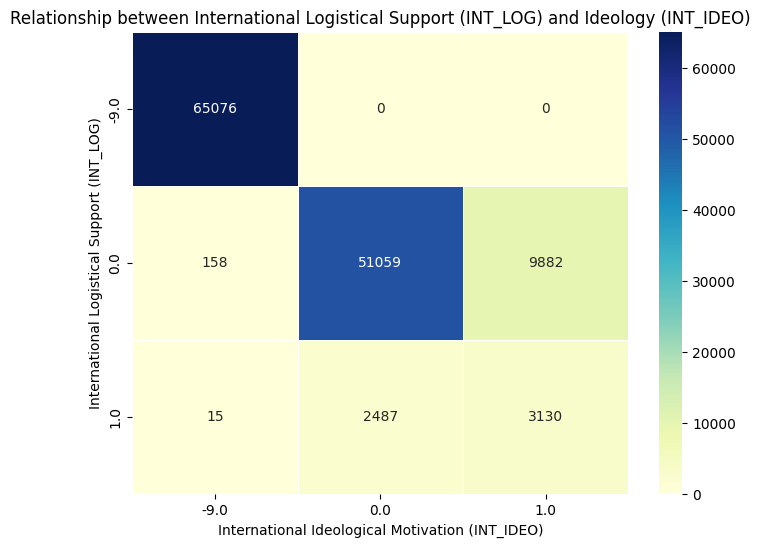

In [ ]:
# Visualize the relationship with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(crosstab_int, annot=True, fmt='d', cmap='YlGnBu', linewidths=.5)
plt.title('Relationship between International Logistical Support (INT_LOG) and Ideology (INT_IDEO)')
plt.xlabel('International Ideological Motivation (INT_IDEO)')
plt.ylabel('International Logistical Support (INT_LOG)')
plt.show()

**Key Observations from the Heatmap Data (crosstab_int)**:

- **High Frequency of '-9' for both**: The cell where INT_LOG is -9.0 and INT_IDEO is -9.0 has a very high count (65,076). This indicates that for a **significant portion of the dataset**, **information regarding both international logistical support and ideological motivation is unknown or not applicable**.

- No International Logistical Support (INT_LOG = 0.0)

a) When there is no international logistical support (INT_LOG = 0.0), **a large number of events** (51,059) also have **no international ideological motivation** (INT_IDEO = 0.0).

b) However, there are **also 9,882 events where there is no international logistical support but there is international ideological motivation**(INT_IDEO = 1.0).

***This suggests that some ideologically-driven international events may not receive direct logistical support.***

- **International Logistical Support** (INT_LOG = 1.0):
When international logistical support is present (INT_LOG = 1.0), ***the majority of events (3,130) also have international ideological motivation*** (INT_IDEO = 1.0).

This is a strong positive association, meaning ** if there's international logistical support, it's very likely driven by an international ideology***.

There are also 2,487 events with international logistical support but no international ideological motivation (INT_IDEO = 0.0).

***This might indicate cases where logistical support is provided without a clear, explicit international ideological goal, or perhaps for reasons not captured by the 'ideology' variable.***